<a href="https://colab.research.google.com/github/SodiKroehler/MSTHESIS/blob/main/MSTHESIS_tinyllamaOnQbias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=bdeffc1a5a822f4f7d3542afb3b7fba0d516ec03fd0c24977103a2ccf29c9ebe
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [2]:
import pandas as pd
from langdetect import detect
from statsmodels.stats.inter_rater import fleiss_kappa
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import cohen_kappa_score
import seaborn as sns

In [5]:
def map_match_type(row):
  text = row['routing']
  match text:
    case 'exact':
      return 1
    case 'near':
      return 2
    case 'no_match':
      return 3
    case 'suggestion':
      return 4
    case _:
      return 0

def detect_language(row):
    text = row['user_query']
    try:
        return detect(text)
    except:
        return 'unknown'

In [6]:
mdf = pd.read_csv('master_list.csv', encoding='utf-8')
# fdf = mdf[mdf['Lang'] != 'es']

### Importing Colors


In [7]:
full_unfiltered_pd_spotlight = pd.read_csv('nov5_combined_with_colors.csv', encoding='utf-8-sig')
colors_df = full_unfiltered_pd_spotlight[['Unnamed: 0', 'user_query', 'bgColor']]

def get_color_warning(row):
  # sID = float(row['message_id'])
  # colors_subset = colors_df[colors_df['Unnamed: 0'] == sID]
  sID = row['user_query']
  colors_subset = colors_df[colors_df['user_query'] == sID]
  # # if sID == '1268606.0':
  # print(colors_subset)
  if colors_subset.empty:
    return '000000__'
  else:
    color = '00000000'
    for idx, row in colors_subset.iterrows():
      if row['bgColor'] != '00000000':
        color = row['bgColor']
        # print(color)
        break

    return colors_subset['bgColor'].values[0]


In [13]:
# cmdf = mdf.merge(colors_df, how='left', left_on='message_id', right_on='Unnamed: 0')
mdf['Lang'] = mdf.apply(detect_language, axis=1)
mdf = mdf.rename(columns={'RefID#': "sID"})
# mdf['bgColor'] = mdf.apply(get_color_warning, axis=1)
mdf.dropna(subset=['user_query'], inplace=True)


In [9]:
# cmdf['Lang'].unique()
# mdf.count()
# mdf.head()
mdf['bgColor'].value_counts()
# colors_df['bgColor'].value_counts()
# colors_df.head()
# mdf.nunique() #2910
# mdf[mdf['message_id'] == float('1268606.0')]
# colors_df[colors_df['Unnamed: 0'] == float('1268606.0')]
# colors_df[colors_df['bgColor'] != '00000000']

,count
bgColor,
00000000,2514
000000__,687
FFD9EAD3,130
FFFFF2CC,61
FFF4CCCC,59
FFB4A7D6,26
FFD9D2E9,3


## Splitting

In [10]:
def get_color_warning(color):
  colors = ['00000000', 'FFD9EAD3', 'FFFFF2CC', 'FFD9D2E9', 'FFFCE5CD', 'FFF4CCCC', 'FFB4A7D6']
  if color in colors:
    return (colors.index(color)+1) / (len(colors)+1)
  else:
    return 0

In [14]:
current_date = pd.to_datetime('now').strftime('%Y-%m-%d')
enmdf = mdf[mdf['Lang'] == 'en'].copy()

In [ ]:
# enmdf['sID'].nunique()
enmdf['bgColor'].value_counts()

,count
bgColor,
00000000,2378
FFD9EAD3,113
000000__,93
FFFFF2CC,54
FFF4CCCC,48
FFB4A7D6,25
FFD9D2E9,3


In [33]:
group_sizes = enmdf.groupby('conversation_id').size()
cutoff = 7
valid_groups = group_sizes[group_sizes <= cutoff].index
lgcmdf = enmdf[~enmdf['conversation_id'].isin(valid_groups)]
smfdf = enmdf[enmdf['conversation_id'].isin(valid_groups)]

In [34]:
# !pip install --upgrade -q gspread

import gspread
import pandas as pd
from google.colab import auth
auth.authenticate_user()
from google.auth import default

creds, _ = default()
gc = gspread.authorize(creds)


# worksheet = gc.open('data_set.csv').sheet1
worksheet = gc.open_by_url('https://docs.google.com/spreadsheets/d/1OAQsHCaY_WZH-a2KBgMQzaOpQJAB-eLVwHMri95oino/edit?gid=119654084#gid=119654084').sheet1
rows = worksheet.get_all_values()
old_fdf = pd.DataFrame.from_records(rows[1:], columns=rows[0]);

In [35]:
# already_coded = [ 1334, 3210, 2363, 1952, 401, 171, 2845, 1955, 2296, 62, 3323, 2721, 950, 455, 458, 1193, 1750, 1437, 1166, 1990, 365, 1167, 1320, 1494, 2536, 923, 1718, 1935, 142, 1974, 425, 187, 3197, 3301, 2649, 273, 2224, 1454, 321,1676, 115, 3021, 1068, 2161, 1209, 1733, 1810, 459, 3321, 2496]
# old_fdf['sID'] = old_fdf['sID'].astype(int)
# old_fdf['sID2'] = old_fdf['sID'].str.replace(',', '').astype(int)
old_fdf['sID2'] = old_fdf['sID'].astype(str).str.replace(r'\D', '', regex=True).astype(int)


already_coded = old_fdf['sID2'].unique()

fdf = smfdf[~smfdf['sID'].isin(already_coded)].copy()


In [36]:
fdf['color_warning'] = fdf['bgColor'].apply(get_color_warning)
fdf['recency_weight'] =  fdf['sID']/max(fdf['sID'])
fdf['match_type_weight'] = fdf.apply(map_match_type, axis=1)
fdf['color_type_weight'] = fdf['color_warning']/max(fdf['color_warning'])
fdf['combined_weight'] = 0.6 * fdf['recency_weight'] + 0.3 * fdf['color_type_weight'] + 0.1 * fdf['match_type_weight']
fdf['sampling_probability'] = fdf['combined_weight'] / fdf['combined_weight'].sum()

In [37]:
tfdf = fdf.copy()
sizes = [800, 100]
for idx, person in enumerate(['M', 'S']):
    sampled = tfdf.sample(n=sizes[idx], weights='sampling_probability', random_state=66)
    sampled_groups= sampled['conversation_id'].unique()
    grouped = fdf[fdf['conversation_id'].isin(sampled_groups)].copy().groupby('conversation_id')
    sorted_groups = sorted(
        grouped,
        key=lambda x: len(x[1])  # Sort by the size of each group
    )
    totalCurrRows=0
    for group_name, group_data in grouped:
      group_size = len(group_data)
      if totalCurrRows + group_size > sizes[idx]:
            continue
      else:
        fdf.loc[fdf['sID'].isin(group_data['sID']), 'coderName'] = person
        totalCurrRows += group_size
    # fdf.loc[fdf['conversation_id'].isin(sampled['conversation_id']), 'coderName'] = person
    tfdf = tfdf.drop(tfdf[tfdf['conversation_id'].isin(sampled_groups)].index)
    tfdf['sampling_probability'] = tfdf['combined_weight'] / tfdf['combined_weight'].sum()
    # if fdf[fdf['coderName'] == person].count() > sizes[idx]:
    #   last_offending_conv_id = fdf[fdf['coderName'] == person].iloc[sizes[idx]]['conversation_id']
    #   break

# for person in all_fdfs:
#   this_df = all_fdfs[person]
#   this_df = this_df.drop(['recency_weight', 'match_type_weight', 'combined_weight', 'sampling_probabilty', 'Lang'])
#   this_df.to_csv(f'{person}.csv', index=False)



In [28]:
# lgcmdf['coderName'] = 'Lg-A'
# lgcmdf = lgcmdf.reset_index(drop=True)
# fdf = fdf.reset_index(drop=True)
# fdf = pd.concat([fdf,lgcmdf])
# fdf['mutipleCoders'] = False
# def prop_coder(group):
#     # Get the first non-None value in the group (or None if none exist)
#     non_none_value = group.dropna().iloc[0] if not group.dropna().empty else ''
#     return group.fillna(non_none_value)

# fdf['coderName'] = fdf.groupby('conversation_id')['coderName'].transform(lambda group: prop_coder(group))

print(fdf.count())
# rows_to_duplicate = fdf[fdf['coderName'] == 'A']
# for new_coder_name in ['N', 'M', 'S']:
#         duplicated = rows_to_duplicate.copy()
#         duplicated['coderName'] = new_coder_name
#         duplicated['mutipleCoders'] = True
#         fdf = pd.concat([fdf, duplicated], ignore_index=True)

# print(fdf.count())

sID                     2368
conversation_id         2368
message_id              2368
user_query              2368
dewey_match             2368
response                2368
routing                 2359
Primary Code               0
Secondary Code             0
Sentiment Tag              0
Bot Answer                 0
Trust Flag                 0
Coder Notes                0
risk                      52
risk_note                 52
created_at              2368
email                     14
Accurate?               1279
Notes                    234
Expert review             96
bgColor                 2368
Lang                    2368
color_warning           2368
recency_weight          2368
match_type_weight       2368
color_type_weight       2368
combined_weight         2368
sampling_probability    2368
coderName               1205
dtype: int64
sID                     2368
conversation_id         2368
message_id              2368
user_query              2368
dewey_match             2368
r

In [51]:
# fdf[fdf['coderName'] == 'A']['sID'].count()
# fdf['sID'].nunique()
# lgcmdf.count()
# pfdf = fdf[fdf['coderName'] != ''].copy()
pfdf = fdf.copy()
pfdf = pfdf[['sID', 'conversation_id', 'message_id', 'user_query', 'dewey_match', 'response', 'created_at', 'coderName']]
pfdf.loc[pfdf['coderName'] == 'S', 'coderName'] = 'sodikroehler@gmail.com'
# # pfdf.loc[pfdf['coderName'] == 'N', 'coderName'] = 'Ana@nefri.web.id'
pfdf.loc[pfdf['coderName'] == 'M', 'coderName'] = 'mifranz1057@gmail.com'


pfdf = pfdf.dropna(subset=['coderName'])
pfdf['coder_name'] = pfdf['coderName']
pfdf.shape
full_cols = old_fdf.columns
for col in full_cols:
  if col not in pfdf.columns:
    pfdf[col] = ''


pfdf = pfdf[old_fdf.columns]
pfdf = pfdf.drop('sID2', axis=1)
pfdf['coding_stage'] = 5.0
pfdf['mutiple_coders_flag'] = True
pfdf.head()

# afdf = pfdf[pfdf['coderName'] == 'A'].copy()
# afdf['mutipleCoders'] = True
# afdf['coderName'] = 'sodikroehler@gmail.com'
# afdf['coderName'] = 'Ana@nefri.web.id'
# afdf['coderName'] = 'mifranz1057@gmail.com'
# pfdf = pfdf.reset_index(drop=True)
# fdf = fdf.reset_index(drop=True)
# pfdf = pd.concat([pfdf,afdf])
# pfdf = pfdf.reset_index(drop=True)
# fdf = fdf.reset_index(drop=True)
# pfdf = pd.concat([pfdf,afdf])


pfdf.to_csv(f'spotlight_coding_sampled_codes'+ pd.to_datetime('now').strftime('%Y-%m-%d_%H-%M-%S') +'.csv', index=False)


<ipython-input-51-9e2334c3915d>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfdf['coder_name'] = pfdf['coderName']
<ipython-input-51-9e2334c3915d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfdf[col] = ''
<ipython-input-51-9e2334c3915d>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [ ]:
# pfdf['coderName'].value_counts()
# fdf.count()
fdf['coderName'].value_counts()
# fdf[fdf['coderName'] == 'A'].count()
# pfdf.head()
# pfdf[pfdf['coderName'] == 'A']
# lgcmdf.count()

,count
coderName,
N,350
M,350
S,350
Lg-A,200
A,50


In [45]:

pfdf.shape

(900, 22)

## Post Processing

In [ ]:
m_df = pd.read_csv('maddie_all_codes.csv', encoding='utf-8')
s_df = pd.read_csv('sodi_all_codes.csv', encoding='utf-8')
n_df = pd.read_csv('nef_all_codes.csv', encoding='utf-8')
m_df['coderName'] = "Maddy"
s_df['coderName'] = "Sodi"
n_df['coderName'] = "Nefriana"
f_df = pd.concat([m_df, s_df, n_df])
f_df['Primary Code'] = f_df['Primary Code'].str.strip().str.replace(r'[^\w]', '', regex=True)
f_df['Secondary Code'] = f_df['Secondary Code'].str.strip().str.replace(r'[^\w]', '', regex=True)
f_df['Sentiment Tag'] = f_df['Sentiment Tag'].str.strip().str.replace(r'[^\w]', '', regex=True)
f_df['Bot Answer'] = f_df['Bot Answer'].str.strip().str.replace(r'[^\w]', '', regex=True)
# f_df['Trust Flag'] = f_df['Trust Flag'].str.strip().str.replace(r'[^\w]', '', regex=True)
f_df.loc[f_df['Bot Answer'] == "near", 'Bot Answer'] = 'SuggestionAlign'
f_df.loc[f_df['Bot Answer'] == "ExactAccpet", 'Bot Answer'] = 'ExactAccept'
f_df.loc[f_df['Bot Answer'].isnull(), 'Bot Answer'] = 'NoMatchShouldAns'
f_df.loc[f_df['Secondary Code'] == "Oth", 'Secondary Code'] = 'Other'
f_df.loc[f_df['Trust Flag'] == "Flag", 'Trust Flag'] = True
f_df.loc[f_df['Trust Flag'] == "[Flag]", 'Trust Flag'] = True
f_df.loc[f_df['Trust Flag'] == "[Flag] ", 'Trust Flag'] = True
f_df.loc[f_df['Trust Flag'].isnull(), 'Trust Flag'] = False

f_df.loc[f_df['Sentiment Tag'] == "POS", 'Sentiment Tag'] = False
f_df.loc[f_df['Sentiment Tag'] == "Neg", 'Sentiment Tag'] = True
f_df.loc[f_df['Sentiment Tag'] == "NEG", 'Sentiment Tag'] = True
f_df.loc[f_df['Sentiment Tag'].isnull(), 'Sentiment Tag'] = False


f_df.dropna(subset=['Primary Code'], inplace=True)
fdf = fdf.astype({"Primary Code": str, "Secondary Code": str, "Sentiment Tag": bool, "Bot Answer": str, "Trust Flag": bool})



In [ ]:
f_df['Sentiment Tag'].unique()
# f_df.loc[f_df['Secondary Code'] == 'Oth']
# f_df[f_df['Bot Answer'].isnull()]

array([False, True], dtype=object)

In [ ]:
sdf = f_df[['RefID#', 'Primary Code', 'Secondary Code', 'Sentiment Tag', 'Bot Answer', 'Trust Flag', "coderName"]].copy()
sdf.columns = ['id', 'prim', 'sec', 'sent', 'answer', 'trust', "coder"]
#pivot on coder name
psdf = sdf.pivot(index='id', columns='coder').reset_index()
psdf.head()

id  prim                                sec               \
coder      Maddy Nefriana Sodi                Maddy     Nefriana   
0       62    EA       EA   EA          PollingFore  PollingFore   
1      115    EL       EL   EL  VotingAccessibility     VoterReg   
2      142    EL       EL   EL             VoterReg     VoterReg   
3      171    EL       EL   EL               Mailin     VoterReg   
4      187     G        G    G           ElectBasic   StateBasic   

                        sent                           answer  \
coder            Sodi  Maddy Nefriana   Sodi            Maddy   
0         PollingFore  False    False  False      ExactAccept   
1      PollingLocTime  False    False  False      ExactAccept   
2            VoterReg  False    False  False      ExactAccept   
3            VotingAc  False    False  False  SuggestionAlign   
4          StateBasic  False    False  False      ExactAccept   

                                            trust                  
coder         Nefriana                Sodi  Maddy Nefriana   Sodi  
0          ExactAccept         ExactAccept  False    False   True  
1          ExactAccept         ExactAccept  False    False  False  
2          ExactAccept         ExactAccept  False    False  False  
3      SuggestionAlign  SuggestionNotAlign  False    False  False  
4          ExactAccept         ExactAccept  False    False  False

In [ ]:
adf = psdf.copy()
for top_level in adf.columns.levels[0]:

    # print(top_level)
    if top_level == 'id':
        continue
    # cols_to_compare = psdf[top_level].columns
    comparison_result = adf[top_level].nunique(axis=1) ==1

    adf[(top_level, 'AllEqual')] = comparison_result


all_equal_columns = adf.columns[adf.columns.get_level_values(1) == 'AllEqual']


adf2 = adf[all_equal_columns]
agreements = adf2.sum()


# columns_to_include = adf.columns.get_level_values(0).isin(['id']) | adf.columns.isin(all_equal_columns)
# adf2 = adf.loc[:, columns_to_include]
#write to csv
adf.to_csv('all_codes_agreement.csv', index=False)

adf2.head()



,prim,sec,sent,answer,trust
coder,AllEqual,AllEqual,AllEqual,AllEqual,AllEqual
0,True,True,True,True,False
1,True,False,True,True,True
2,True,True,True,True,True
3,True,False,True,False,True
4,True,False,True,True,True


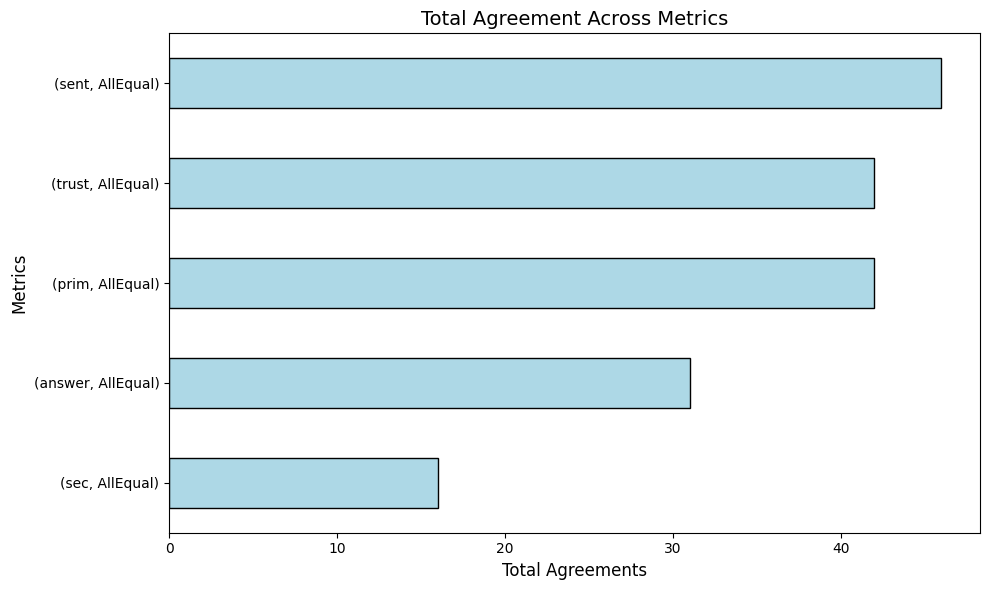

In [ ]:
plt.figure(figsize=(10, 6))
agreements.sort_values().plot(kind='barh', color='lightblue', edgecolor='black')
plt.title('Total Agreement Across Metrics', fontsize=14)
plt.xlabel('Total Agreements', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
# new_labels = ['Sentiment Score', 'Trust Flag', 'Primary Code', 'Bot Answer', 'Secondary Code']
# plt.yticks(ticks=range(len(new_labels)), labels=new_labels)
plt.tight_layout()
plt.show()


In [ ]:
agreements_df = pd.DataFrame(agreements, columns=['Total Agreements'])
agreements_df

,,Total Agreements
,coder,
prim,AllEqual,42
sec,AllEqual,16
sent,AllEqual,46
answer,AllEqual,31
trust,AllEqual,42


In [ ]:
fkpsdf = psdf.copy()
fliesses = []

for top_level in fkpsdf.columns.levels[0]:
    if top_level == 'id':
        continue



    df = fkpsdf[top_level]
    categories = df.values.flatten()
    unique_categories = pd.Series(categories).unique()

    freq_table = []
    for _, row in df.iterrows():
        counts = [sum(row == category) for category in unique_categories]
        freq_table.append(counts)
    freq_table_df = pd.DataFrame(freq_table, columns=unique_categories)

    # if top_level == 'sent':
    #   print(freq_table_df)
    kappa_score = fleiss_kappa(freq_table_df.to_numpy())
    fliesses.append([top_level, kappa_score])


fliesses_df = pd.DataFrame(fliesses, columns=['metric', 'kappa'])
fliesses_df


,metric,kappa
0,prim,0.806396
1,sec,0.444005
2,sent,-0.027397
3,answer,0.564324
4,trust,0.407407


In [ ]:
kappa_scores = []
psdf['sent'] = psdf['sent'].astype(bool)
psdf['trust'] = psdf['trust'].astype(bool)

for top_level in psdf.columns.levels[0]:
    if top_level == 'id':
        continue

    df = psdf[top_level]
    pairs =[("Maddy", "Nefriana"), ("Maddy", "Sodi"), ("Nefriana", "Sodi")]
    # print(top_level)
    for coder1, coder2 in pairs:
      kappa = cohen_kappa_score(df[coder1], df[coder2])
      # print(kappa)
      kappa_scores.append([top_level, f"{coder1} vs {coder2}", kappa])

    # break



cohens_df = pd.DataFrame(kappa_scores, columns=['metric', 'rater_pair','kappa'])
cohens_df

# psdf['sent']

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:730: RuntimeWarning: invalid value encountered in scalar divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


,metric,rater_pair,kappa
0,prim,Maddy vs Nefriana,0.740091
1,prim,Maddy vs Sodi,0.808673
2,prim,Nefriana vs Sodi,0.870466
3,sec,Maddy vs Nefriana,0.474376
4,sec,Maddy vs Sodi,0.418605
5,sec,Nefriana vs Sodi,0.466430
6,sent,Maddy vs Nefriana,0.000000
7,sent,Maddy vs Sodi,NaN
8,sent,Nefriana vs Sodi,0.000000
9,answer,Maddy vs Nefriana,0.701393


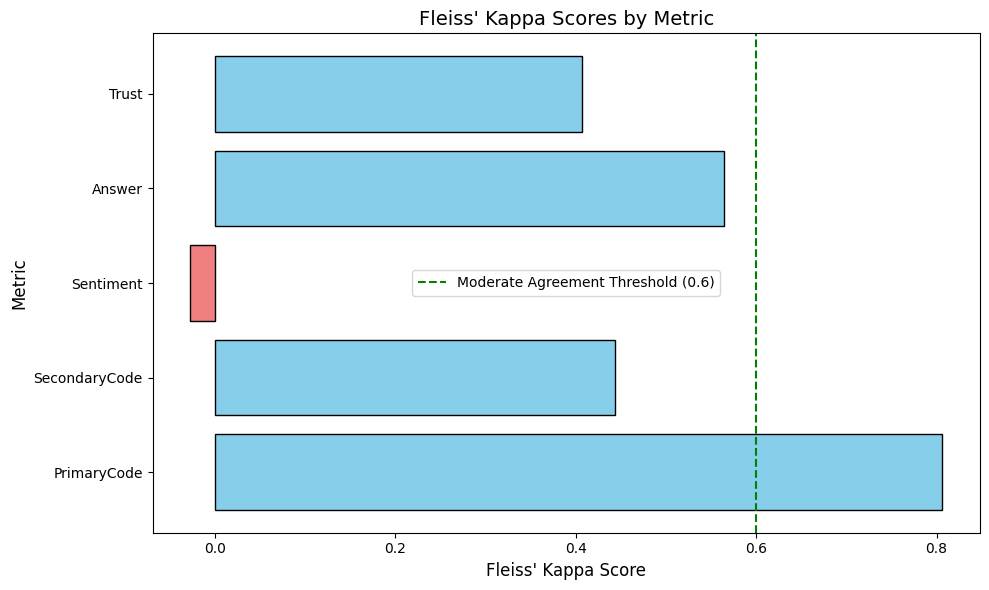

In [ ]:

# Fleiss' Kappa data
data = {
    "PrimaryCode": 0.8063960992399254,
    "SecondaryCode": 0.4440051398635958,
    "Sentiment": -0.027397260273972487,
    "Answer": 0.5643241711533012,
    "Trust": 0.4074074074074077
}

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
colors = ['skyblue' if kappa >= 0 else 'lightcoral' for kappa in data.values()]  # Highlight negative values
plt.barh(list(data.keys()), list(data.values()), color=colors, edgecolor='black')

# Add reference lines for agreement thresholds
plt.axvline(x=0.6, color='green', linestyle='--', label='Moderate Agreement Threshold (0.6)')
plt.axvline(x=0.4, color='orange', linestyle='--', label='Fair Agreement Threshold (0.4)')
plt.axvline(x=0.0, color='red', linestyle='--', label='No Agreement (0.0)')

# Title and labels
plt.title("Fleiss' Kappa Scores by Metric", fontsize=14)
plt.xlabel("Fleiss' Kappa Score", fontsize=12)
plt.ylabel("Metric", fontsize=12)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


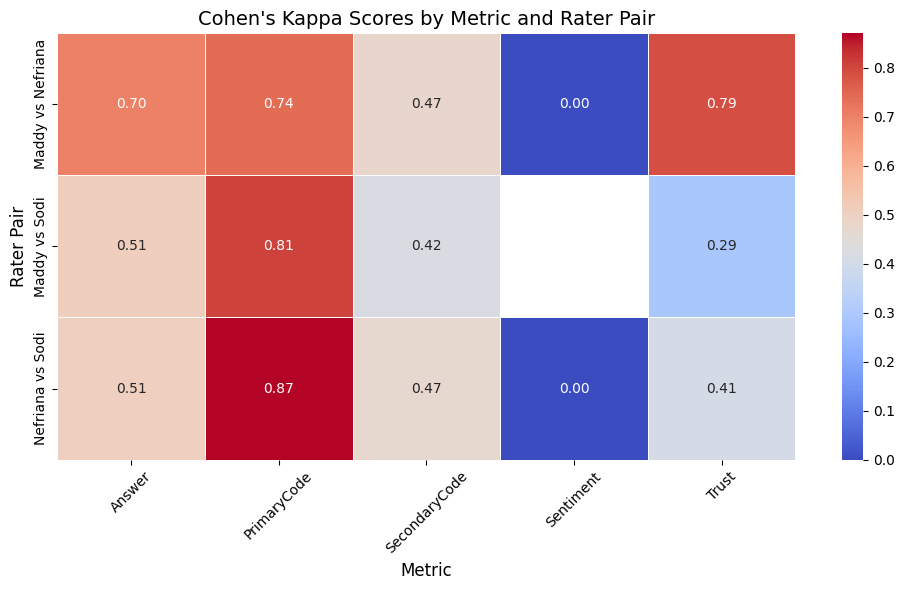

In [ ]:

data = {
    "index": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    "metric": [
        "PrimaryCode", "PrimaryCode", "PrimaryCode",
        "SecondaryCode", "SecondaryCode", "SecondaryCode",
        "Sentiment", "Sentiment", "Sentiment",
        "Answer", "Answer", "Answer",
        "Trust", "Trust", "Trust"
    ],
    "rater_pair": [
        "Maddy vs Nefriana", "Maddy vs Sodi", "Nefriana vs Sodi",
        "Maddy vs Nefriana", "Maddy vs Sodi", "Nefriana vs Sodi",
        "Maddy vs Nefriana", "Maddy vs Sodi", "Nefriana vs Sodi",
        "Maddy vs Nefriana", "Maddy vs Sodi", "Nefriana vs Sodi",
        "Maddy vs Nefriana", "Maddy vs Sodi", "Nefriana vs Sodi"
    ],
    "kappa": [
        0.7401, 0.8087, 0.8705,
        0.4744, 0.4186, 0.4664,
        0.0, None, 0.0,
        0.7014, 0.5074, 0.5062,
        0.7899, 0.2857, 0.4068
    ]
}
df = pd.DataFrame(data)

# Pivot for heatmap
pivot_df = df.pivot(index="rater_pair", columns="metric", values="kappa")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", cbar=True, fmt=".2f", linewidths=0.5)
plt.title("Cohen's Kappa Scores by Metric and Rater Pair", fontsize=14)
plt.ylabel("Rater Pair", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
